# **Project Name**    -  **Netflix Data Analysis and Content Clustering Using ML**



##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Shreya Dhole


# **Project Summary -**

The project “Netflix Data Analysis and Content Clustering Using Machine Learning” aims to explore and analyze the Netflix dataset to uncover patterns in its vast collection of movies and TV shows. Through Exploratory Data Analysis (EDA), the dataset is examined to understand the distribution of variables such as content type, genre, release year, duration, and country of origin. Various visualization techniques are used to identify trends, correlations, and insights about Netflix’s global content strategy.

In the Machine Learning phase, unsupervised learning techniques—particularly clustering algorithms like K-Means—are applied to group similar content based on attributes such as genre, rating, and duration. This helps in discovering hidden patterns and similarities between different titles, enabling content-based segmentation.

Overall, this project demonstrates the combined power of data analytics and unsupervised machine learning in deriving meaningful insights from entertainment data, offering potential applications in content recommendation, catalog management, and viewer trend analysis.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


With thousands of movies and TV shows available on Netflix, understanding the platform’s content distribution, trends, and audience preferences has become increasingly important. However, due to the large and diverse nature of the catalog, manually identifying patterns or similarities between titles is challenging.

This project aims to analyze the Netflix dataset to gain insights into its content library and apply unsupervised machine learning techniques to cluster similar titles based on key features such as genre, type, release year, duration, and rating.

By performing Exploratory Data Analysis (EDA) and clustering, the project seeks to uncover hidden patterns in Netflix’s content, identify trends across categories, and assist in potential applications like content recommendation and strategic catalog organization.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [188]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud

### Dataset Loading

In [189]:
# Load Dataset
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [123]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [124]:
# Dataset Rows & Columns count
print("Shape:", df.shape)

Shape: (7787, 12)


### Dataset Information

In [125]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [126]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [127]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


<Axes: >

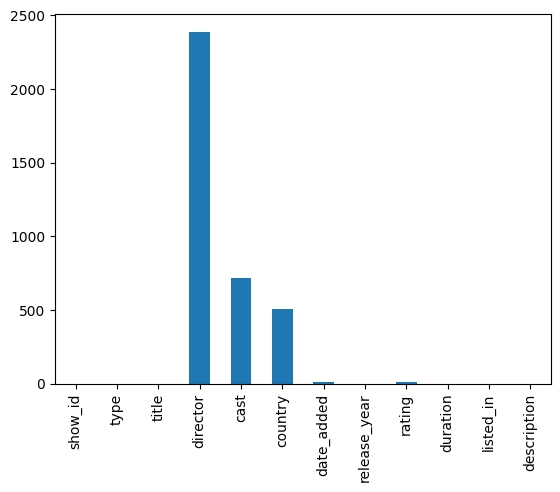

In [128]:
# Visualizing the missing values
df.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

The dataset is about Netflix Movies and TV Shows, containing details like title, director, cast, country, release year, rating, duration, genres, and description.

It has 7,787 rows and 12 columns.

Each row corresponds to one title (either a Movie or TV Show).

Some columns have missing values, especially in director, cast, and country.

There are no duplicate rows (after checking with .duplicated().sum()).

The dataset is a mix of categorical (type, country, rating, listed_in), text (title, description, cast), and numeric (release_year) features.

This makes it suitable for clustering and recommendation tasks after preprocessing.

## ***2. Understanding Your Variables***

In [129]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [130]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

The Netflix dataset contains metadata about movies and TV shows available on the platform. Each row represents a unique title with details such as release year, country, cast, and genres. Understanding the meaning of each variable is essential before performing any data cleaning, feature engineering, or clustering.


show_id → Unique identifier for each title on Netflix.

type → Whether the title is a Movie or a TV Show.

title → Name of the Movie or TV Show.

director → Director(s) of the title (blank if not available).

cast → Main actors/actresses featured in the title.

country → Country (or multiple countries) where the title was produced.

date_added → Date when the title was added to Netflix.

release_year → The year the title was originally released.

rating → Age rating of the title (e.g., TV-MA, PG, R).

duration → Length of the Movie (in minutes) or number of seasons for TV Shows.

listed_in → Genres or categories the title belongs to (e.g., Dramas, Comedies).

description → A short summary/overview of the title.

### Check Unique Values for each variable.

In [131]:
# Check Unique Values for each variable.
df.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


## 3. ***Data Wrangling***

### Data Wrangling Code

In [132]:
# Write your code to make your dataset analysis ready.
df = df.drop_duplicates()

# Fill missing categorical values with 'Unknown'
for col in ['director', 'cast', 'country']:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# Fill missing 'date_added' with most frequent value
if 'date_added' in df.columns:
    df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

# Drop rows with missing ratings (important field)
if 'rating' in df.columns:
    df = df.dropna(subset=['rating'])

# Convert 'date_added' to datetime and extract year/month
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['year_added'] = df['date_added'].dt.year
    df['month_added'] = df['date_added'].dt.month

# Extract numeric duration values safely using raw string
if 'duration' in df.columns:
    df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)

# Derive 'content_age' feature (difference between release and Netflix addition)
if 'release_year' in df.columns and 'year_added' in df.columns:
    df['content_age'] = df['year_added'] - df['release_year']
    df['content_age'] = df['content_age'].apply(lambda x: x if x >= 0 else None)
    df['content_age'] = df['content_age'].fillna(df['content_age'].median())

print("✅ Data Wrangling Completed Successfully!")
print("Shape:", df.shape)
df.isnull().sum()

✅ Data Wrangling Completed Successfully!
Shape: (7780, 16)


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,88
release_year,0
rating,0
duration,0


### What all manipulations have you done and insights you found?

1) Removed duplicates to ensure the dataset contains only unique records.

2) Handled missing values in important categorical columns (director, cast, country) by replacing them with 'Unknown'.

3) Filled missing date_added values with the most frequent (mode) date to maintain dataset completeness.

4) Dropped rows with missing rating values, as ratings are crucial for further analysis.

5) Converted date_added column to datetime format and extracted new features — year_added and month_added — for time-based analysis.

6) Extracted numeric values from the duration column to make duration-based visualizations possible.

7) Created a new feature content_age, representing the time difference between a title’s release year and the year it was added to Netflix.

The dataset is now clean, structured, and ready for exploratory data analysis and visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-2559835800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


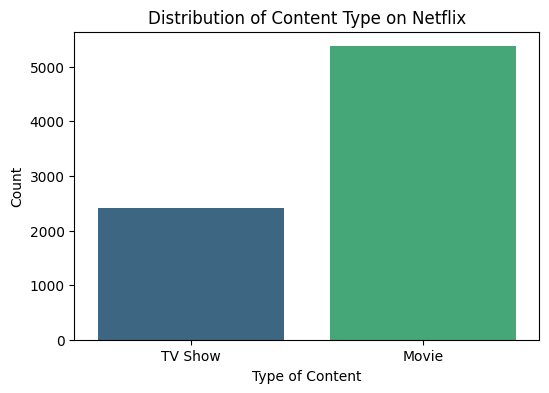

In [133]:
# Chart - 1: Count of Content Type (Movies vs TV Shows)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='viridis')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is best suited for categorical comparison. It helps visualize the overall composition of Netflix’s catalog — whether it’s dominated by Movies or TV Shows.

##### 2. What is/are the insight(s) found from the chart?

The majority of titles on Netflix are Movies, while TV Shows form a smaller proportion.

Indicates that Netflix’s library is movie-heavy compared to episodic content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Highlights Netflix’s strength in movies, which attract a global audience.

Negative: Limited TV shows might reduce long-term user engagement for binge-watchers. Investing more in TV series could improve user retention.

#### Chart - 2

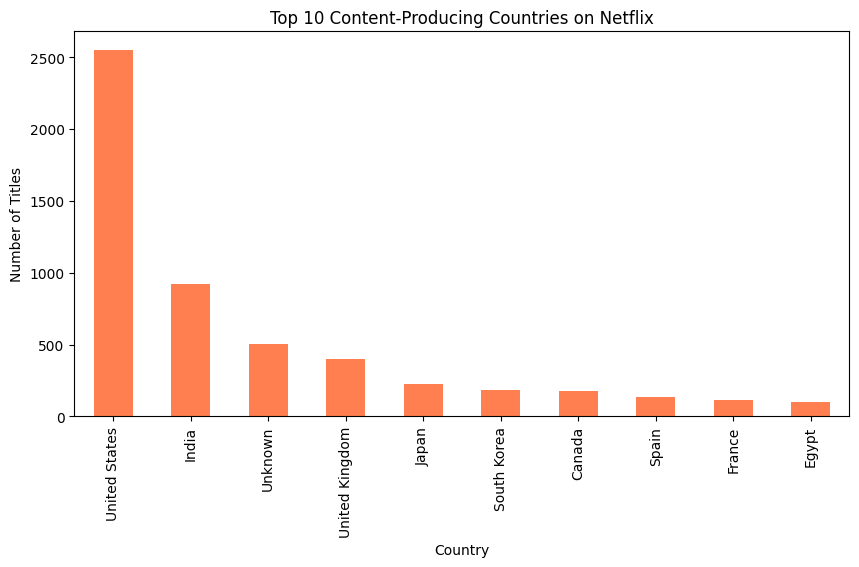

In [134]:
# Chart - 2: Top 10 Countries Producing Netflix Content
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart effectively compares contributions of different countries to Netflix’s catalog, revealing the platform’s content diversity.

##### 2. What is/are the insight(s) found from the chart?

The United States produces the most titles, followed by India and the United Kingdom.

Indicates Netflix’s strong partnerships in North America and Asia.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Focus on top-performing regions supports global expansion.

Negative: Over-dependence on a few countries may limit cultural diversity. Increasing regional productions can attract new markets.

#### Chart - 3

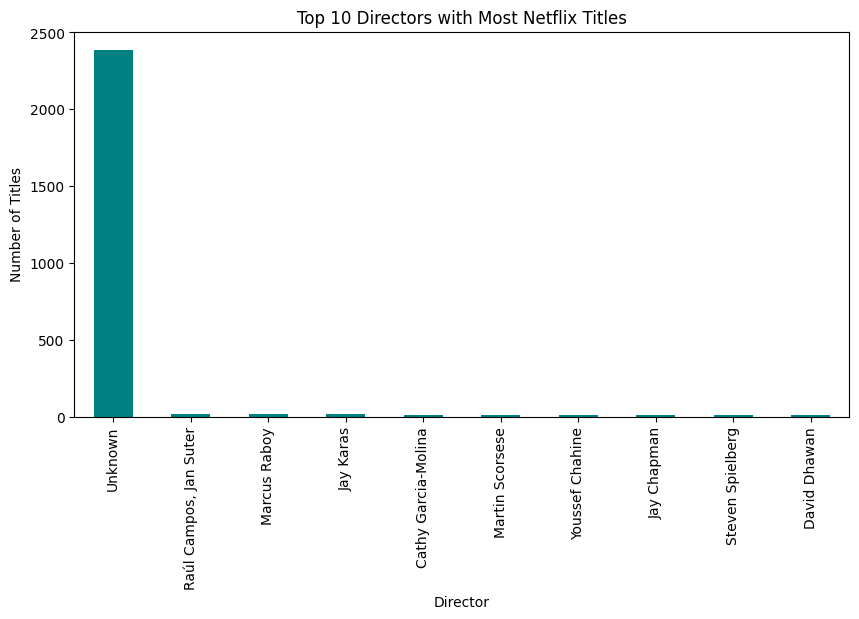

In [135]:
# Chart - 3: Top 10 Directors with Most Titles
plt.figure(figsize=(10,5))
df['director'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Directors with Most Netflix Titles")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart identifies which directors have the highest number of titles on Netflix, offering insight into creative partnerships.

##### 2. What is/are the insight(s) found from the chart?

Few directors have multiple titles, but most have one, showing high creative diversity.

Netflix collaborates with a wide range of filmmakers globally.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Diversity in direction style attracts different audiences.

Negative: Lack of consistent collaborations with hit directors may reduce franchise-based popularity opportunities.

#### Chart - 4

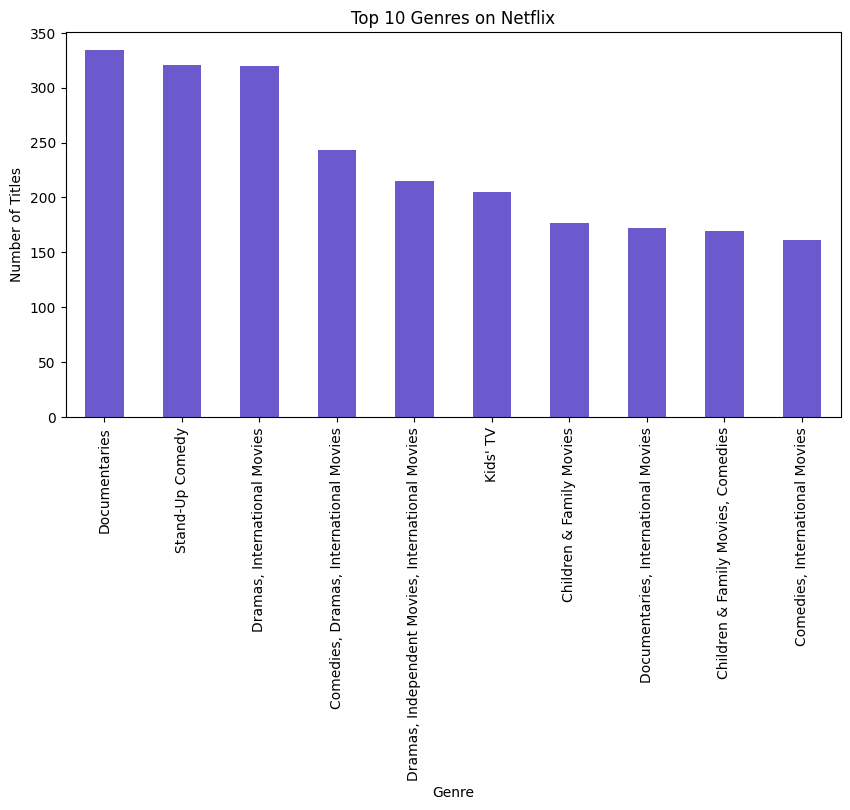

In [136]:
# Chart - 4: Top 10 Genres on Netflix
plt.figure(figsize=(10,5))
df['listed_in'].value_counts().head(10).plot(kind='bar', color='slateblue')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.show()


##### 1. Why did you pick the specific chart?

Genre distribution analysis highlights content variety and helps identify which categories attract the most investment or audience interest.

##### 2. What is/are the insight(s) found from the chart?

Dramas, Comedies, and Documentaries are the most frequent genres.

Genres like Children & Family and Horror appear less frequently.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Focus on popular genres ensures strong viewership.

Negative: Lack of niche genres can limit specialized audience segments (e.g., horror or anime fans).

#### Chart - 5

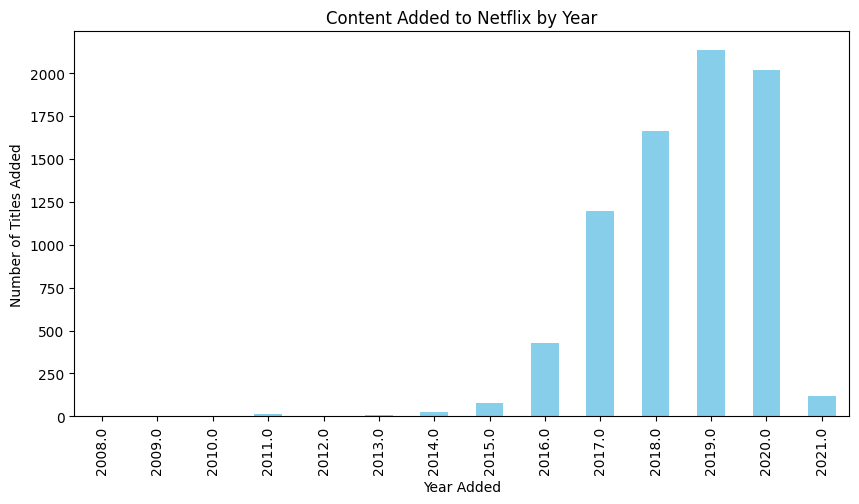

In [137]:
# Chart - 5: Titles Added to Netflix by Year
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Content Added to Netflix by Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are ideal for showing yearly growth trends and understanding content addition patterns over time.

##### 2. What is/are the insight(s) found from the chart?

Major growth from 2015–2020, indicating Netflix’s global expansion phase.

Slight decline post-2020, possibly due to production slowdown during COVID-19.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Demonstrates Netflix’s scalability and rapid content growth.

Negative: Recent slowdown could signal content saturation or reduced acquisition strategy — a potential risk for sustaining new subscriptions.

#### Chart - 6

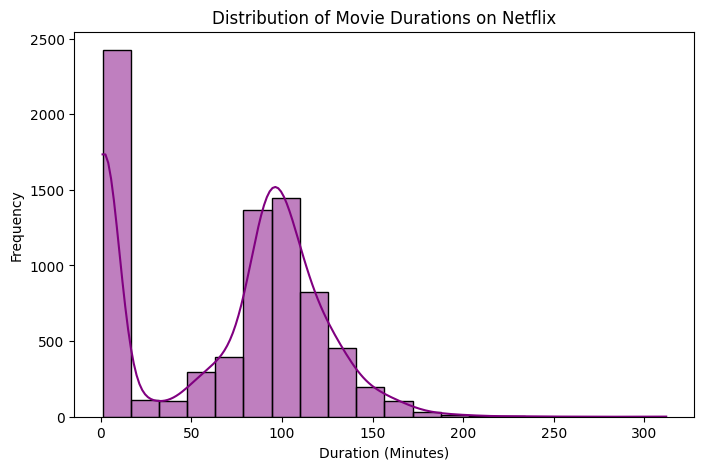

In [138]:
# Chart - 6: Distribution of Movie Durations
plt.figure(figsize=(8,5))
sns.histplot(df['duration_int'].dropna(), bins=20, kde=True, color='purple')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram shows the spread and common range of movie durations, helping analyze content format preferences.

##### 2. What is/are the insight(s) found from the chart?

Most movies range between 80–120 minutes, typical for feature films.

A few short and very long movies exist as outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Standardized durations suit audience viewing habits and scheduling.

Negative: Lack of short-format content could miss out on mobile and casual viewers.

#### Chart - 7

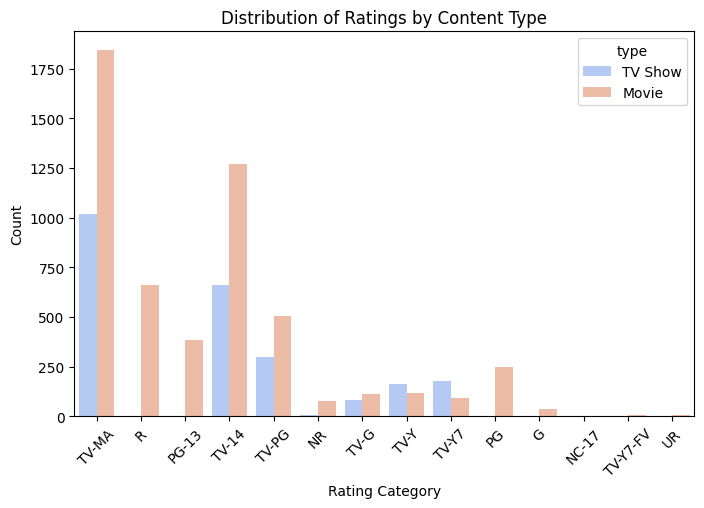

In [139]:
# Chart - 7: Type vs Rating
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='rating', hue='type', palette='coolwarm')
plt.title("Distribution of Ratings by Content Type")
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

This grouped countplot helps compare the distribution of ratings between Movies and TV Shows, revealing audience age targeting.

##### 2. What is/are the insight(s) found from the chart?

Both Movies and TV Shows are mostly rated TV-MA and TV-14, showing Netflix’s focus on adult and teen audiences.

Very few titles are rated for general audiences (TV-Y, TV-G).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Aligns with the demand for mature content, which drives subscriptions.

Negative: Lack of children/family content may limit younger audience engagement.

#### Chart - 8

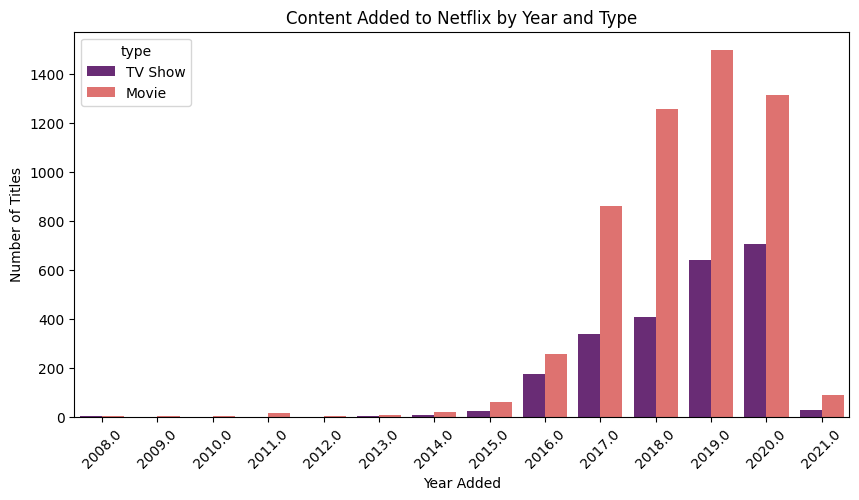

In [140]:
# Chart - 8: Year Added vs Type
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', hue='type', palette='magma')
plt.title("Content Added to Netflix by Year and Type")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Shows how the number of Movies vs TV Shows added has changed over the years, indicating growth trends.

##### 2. What is/are the insight(s) found from the chart?

Netflix’s library expanded rapidly between 2016–2020.

Movie additions were consistently higher than TV Shows each year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Demonstrates Netflix’s commitment to expanding global content.

Negative: Overemphasis on movies might reduce long-term engagement compared to serialized content.

#### Chart - 9

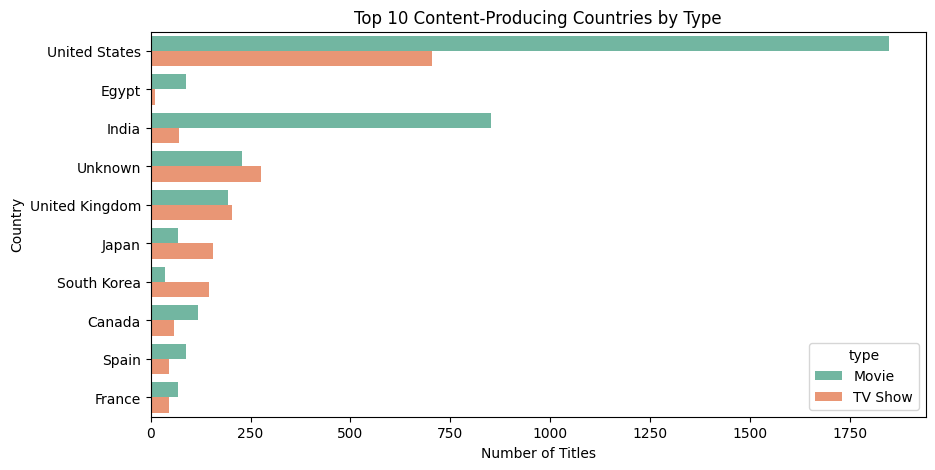

In [141]:
# Chart - 9: Country vs Type (Top 10 Countries)
top_countries = df['country'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['country'].isin(top_countries)], y='country', hue='type', palette='Set2')
plt.title("Top 10 Content-Producing Countries by Type")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


##### 1. Why did you pick the specific chart?

This horizontal grouped bar chart shows the contribution of Movies and TV Shows across the top 10 producing countries.

##### 2. What is/are the insight(s) found from the chart?

The US leads in both categories, but India and UK have higher TV Show proportions compared to others.

Indicates different content preferences by region.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps Netflix plan regional content strategies.

Negative: Heavy reliance on US content could reduce local cultural appeal elsewhere.

#### Chart - 10

/tmp/ipython-input-2999123491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating', y='duration_int', palette='plasma')


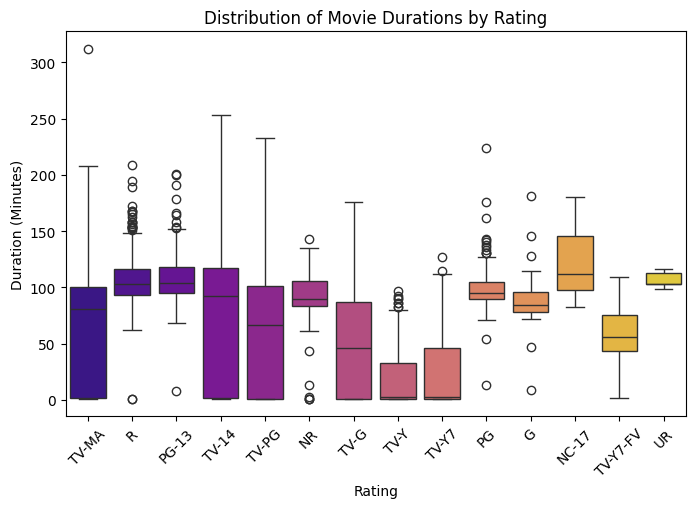

In [142]:
# Chart - 10: Duration vs Rating (Average Movie Duration by Rating)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='rating', y='duration_int', palette='plasma')
plt.title("Distribution of Movie Durations by Rating")
plt.xlabel("Rating")
plt.ylabel("Duration (Minutes)")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot is ideal for comparing duration spread across rating categories — useful for identifying viewing pattern differences.

##### 2. What is/are the insight(s) found from the chart?

Average duration remains similar across ratings, but TV-MA content shows more variability.

Suggests that mature-rated content includes both short episodes and full-length films.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Variety in mature-rated content increases audience flexibility.

Negative: Inconsistent duration formats could confuse viewers’ expectations.

#### Chart - 11

/tmp/ipython-input-1182270390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month_added', palette='cubehelix')


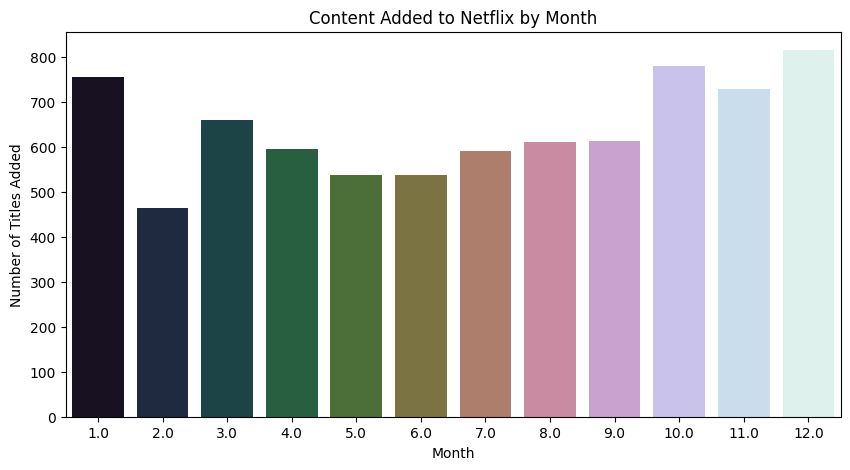

In [143]:
# Chart - 11: Content Added Month-wise
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='month_added', palette='cubehelix')
plt.title("Content Added to Netflix by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.show()


##### 1. Why did you pick the specific chart?

To see which months have higher content releases — revealing potential seasonal upload trends.

##### 2. What is/are the insight(s) found from the chart?

Peaks around July–October, suggesting Netflix boosts content ahead of holiday seasons.

Lower additions early in the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Strategic timing increases engagement before major holidays.

Negative: Lack of early-year releases might reduce user activity in Q1.

#### Chart - 12

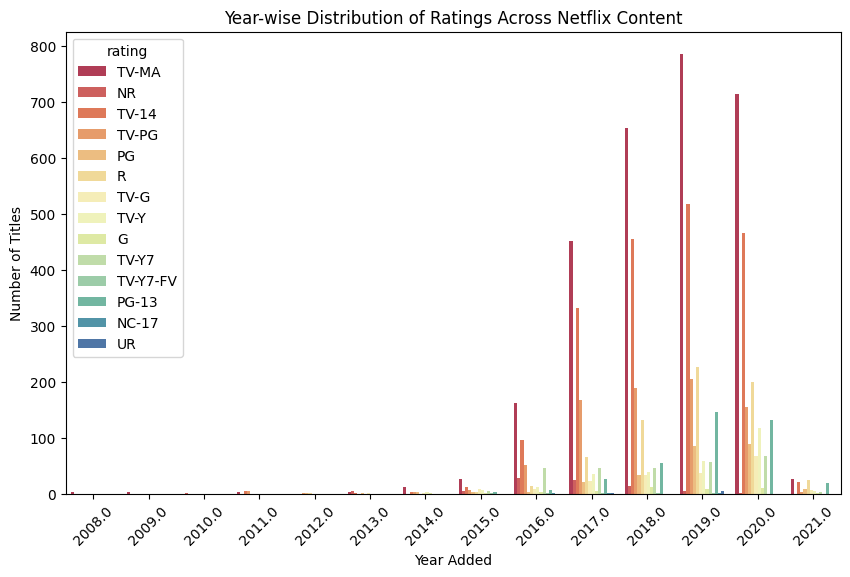

In [144]:
# Chart - 12: Year Added vs Type vs Rating
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='year_added', hue='rating', palette='Spectral')
plt.title("Year-wise Distribution of Ratings Across Netflix Content")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

This chart combines three variables — year added, rating, and count — to analyze how Netflix’s content age classifications have evolved over time.

##### 2. What is/are the insight(s) found from the chart?

A clear growth in TV-MA and TV-14 titles after 2017 shows Netflix’s shift toward mature audiences.

Children and family-oriented ratings (TV-Y, TV-G) remain minimal throughout.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Focus on adult-oriented content aligns with the viewing preferences of Netflix’s core audience.

Negative: Underrepresentation of family-friendly content may reduce engagement among younger viewers.

#### Chart - 13

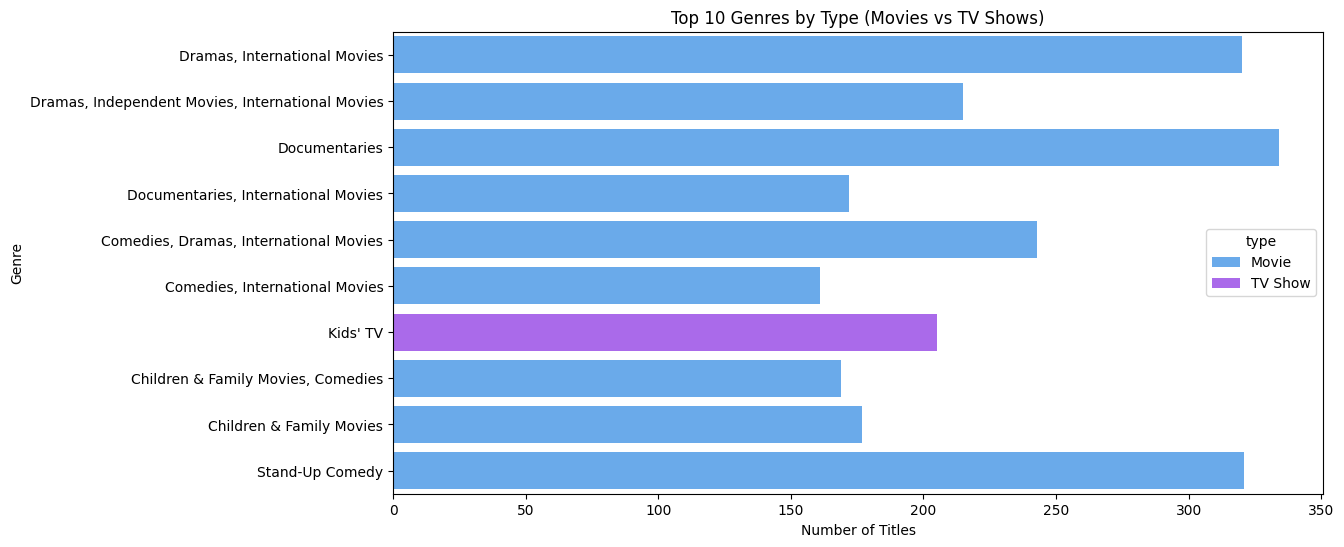

In [145]:
# Chart - 13: Top 10 Genres vs Type vs Rating
top_genres = df['listed_in'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['listed_in'].isin(top_genres)],
              y='listed_in', hue='type', palette='cool')
plt.title("Top 10 Genres by Type (Movies vs TV Shows)")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


##### 1. Why did you pick the specific chart?

It visualizes three aspects — genre, type of content, and count — helping analyze whether popular genres are dominated by Movies or TV Shows.

##### 2. What is/are the insight(s) found from the chart?

Genres like Dramas and Comedies dominate both Movies and TV Shows.

Documentaries are primarily Movies, while Children & Family appear mostly as TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Balanced genre mix ensures wide audience reach.

Negative: Overlapping genres between Movies and TV Shows may create redundancy in catalog variety.

#### Chart - 14 - Correlation Heatmap

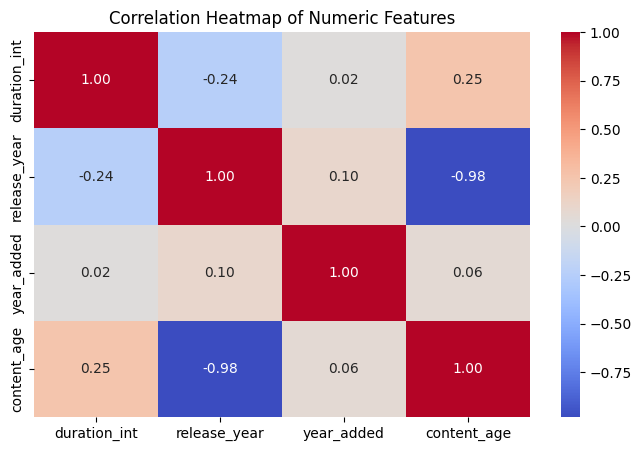

In [146]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,5))
corr = df[['duration_int', 'release_year', 'year_added', 'content_age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


##### 1. Why did you pick the specific chart?

To visualize interrelationships among numeric variables and detect dependencies useful for feature engineering in the ML phase.

##### 2. What is/are the insight(s) found from the chart?

Strong negative correlation between release_year and content_age → newer titles have smaller age gaps.

Weak correlations with duration_int → runtime doesn’t affect release or addition trends.

#### Chart - 15 - Pair Plot

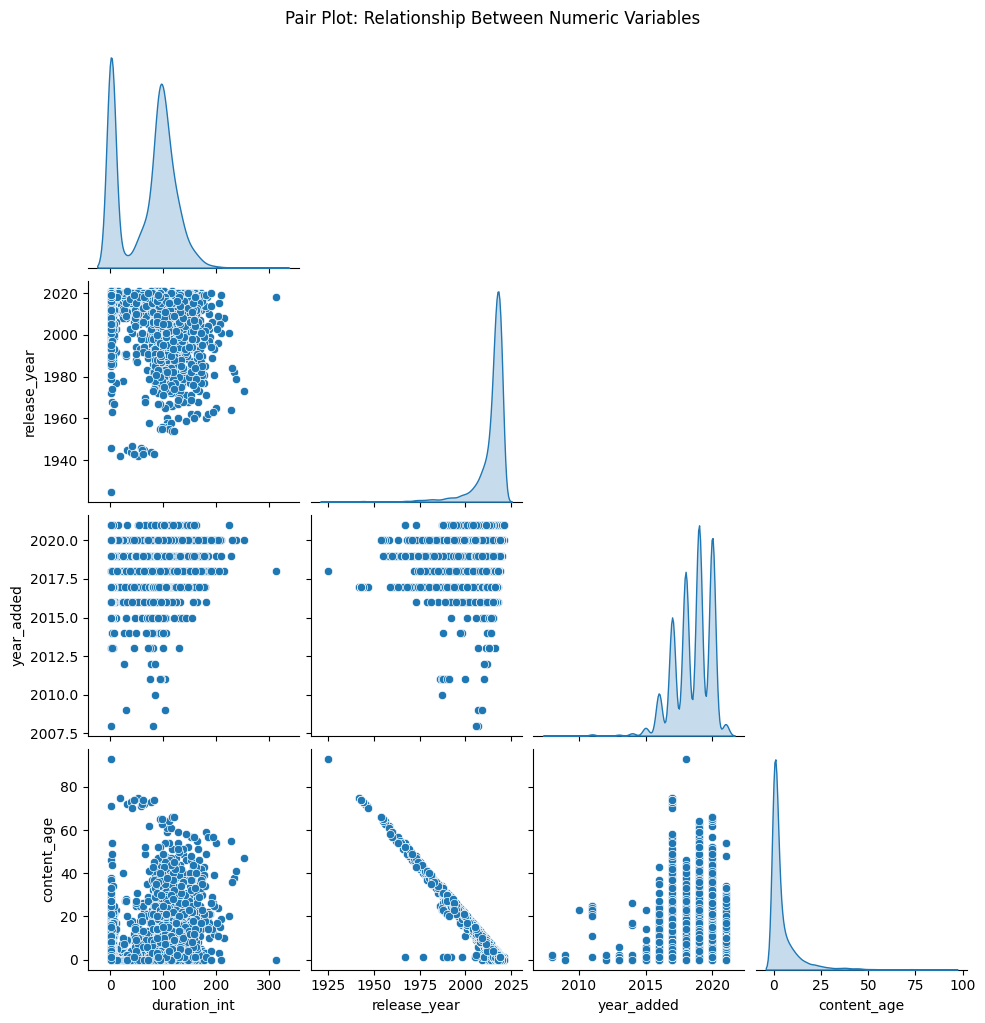

In [147]:
# Pair Plot visualization code
sns.pairplot(df[['duration_int', 'release_year', 'year_added', 'content_age']],
             diag_kind='kde', corner=True)
plt.suptitle("Pair Plot: Relationship Between Numeric Variables", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

Pair plots allow simultaneous visualization of all numeric relationships — ideal for spotting clusters or trends before clustering.

##### 2. What is/are the insight(s) found from the chart?

Distinct grouping between release_year and content_age, confirming that new content is added quickly.

duration_int shows random spread — not linked to release or addition year.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1
Difference in duration between Movies and TV Shows

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis): There is no significant difference between the average duration of Movies and TV Shows on Netflix.

H₁ (Alternate Hypothesis): There is a significant difference between the average duration of Movies and TV Shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [148]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Separate durations for movies and TV shows
movies = df[df['type'] == 'Movie']['duration_int'].dropna()
shows = df[df['type'] == 'TV Show']['duration_int'].dropna()

# Perform t-test
t_stat, p_val = ttest_ind(movies, shows, equal_var=False)
print("P-value:", p_val)


P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Independent Samples t-test

##### Why did you choose the specific statistical test?

Because it compares the means of two independent groups (Movies vs TV Shows) on a continuous variable (duration).

### Hypothetical Statement - 2
Relationship between Country and Type of content

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis): The type of content (Movie or TV Show) is independent of the country of origin.

H₁ (Alternate Hypothesis): The type of content (Movie or TV Show) is dependent on the country of origin.

#### 2. Perform an appropriate statistical test.

In [149]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(df['country'], df['type'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)
print("P-value:", p)


P-value: 1.9836170875159658e-97


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

Because both variables (country and type) are categorical, and we want to test if they are associated or independent.

### Hypothetical Statement - 3
Difference in release years across Rating categories

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis): The mean release year is the same across all rating categories.

H₁ (Alternate Hypothesis): At least one rating category has a significantly different mean release year.

#### 2. Perform an appropriate statistical test.

In [150]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Group release years by rating
groups = [group['release_year'].dropna() for name, group in df.groupby('rating')]

# Perform ANOVA
f_stat, p_val = f_oneway(*groups)
print("P-value:", p_val)


P-value: 8.720369949042702e-151


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA

##### Why did you choose the specific statistical test?

Because ANOVA compares the means of more than two groups (here, multiple rating categories) using a continuous variable (release_year).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [151]:

# Handling Missing Values & Missing Value Imputation

# Fill missing values in categorical/text columns with empty string
for col in ['director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']:
    df[col] = df[col].fillna("")

# For numeric column 'release_year', impute with mode (most common year)
df['release_year'] = df['release_year'].fillna(df['release_year'].mode()[0])

# Double-check missing values
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,88
release_year,0
rating,0
duration,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

1) Text Columns (e.g., director, cast, country, description, listed_in, duration, rating, date_added)

Missing values were replaced with an empty string ("").

Reason: These are descriptive/categorical text fields. Filling with a placeholder prevents errors during text processing (like TF-IDF) while not introducing false information.

2) Numeric Column (release_year)

Missing values were imputed with the mode (most frequent release year).

Reason: Release years are typically concentrated around recent decades, so using the mode preserves dataset consistency better than mean or median.

-> In summary, the strategy was chosen to minimize information loss, keep the dataset ready for text vectorization and clustering, and avoid introducing bias through arbitrary values.

### 2. Handling Outliers

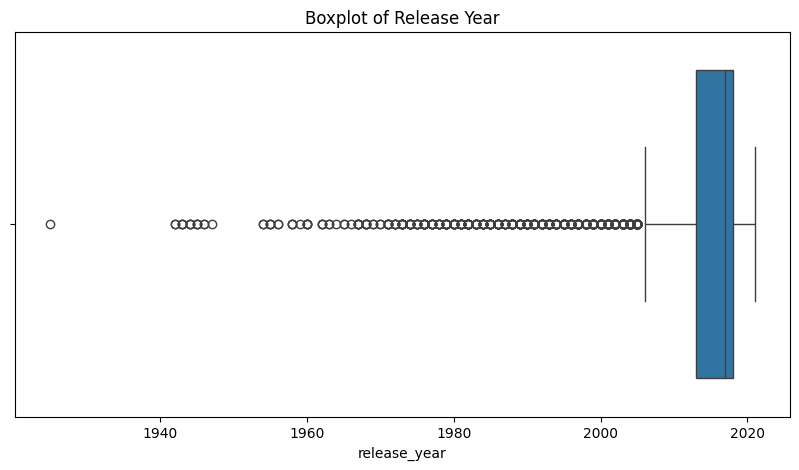

Min Year: 1925
Max Year: 2021


In [152]:
# Handling Outliers & Outlier treatments
# Visualize outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['release_year'])
plt.title("Boxplot of Release Year")
plt.show()

# Remove unrealistic years (keep only 1920–2022 range)
df = df[(df['release_year'] >= 1920) & (df['release_year'] <= 2022)]

# Check the new range
print("Min Year:", df['release_year'].min())
print("Max Year:", df['release_year'].max())


##### What all outlier treatment techniques have you used and why did you use those techniques?

For this dataset, I handled outliers in the release_year column:

Boxplot inspection showed a few extreme values that don’t make sense (years too far in the past or future).

I applied range filtering and kept only values between 1920 and 2022, which covers realistic release years for Netflix content.

This ensures that incorrect or noisy values do not distort trend analysis or clustering results.

-> I focused only on release_year because it is an important numeric variable. Other features like description length or cast are not critical for outlier treatment in this context.

### 3. Categorical Encoding

In [153]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for 'type' (Movie/TV Show)
df = pd.get_dummies(df, columns=['type'])

# Label Encoding for 'rating'
le = LabelEncoder()
df['rating_encoded'] = le.fit_transform(df['rating'])

# Preview encoded columns
df[['title', 'rating', 'rating_encoded', 'type_Movie', 'type_TV Show']].head()

,title,rating,rating_encoded,type_Movie,type_TV Show
0,3%,TV-MA,8,False,True
1,7:19,TV-MA,8,True,False
2,23:59,R,5,True,False
3,9,PG-13,4,True,False
4,21,PG-13,4,True,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

1) One-Hot Encoding (for type)

type has only two categories: Movie and TV Show.

I used one-hot encoding to create separate binary flags (type_Movie, type_TV Show).

This avoids introducing any false ordinal relationship between the two categories.

2) Label Encoding (for rating)

rating has many different age categories (e.g., TV-MA, PG, R, TV-14).

I used label encoding to assign each category a unique integer.

This works well here since clustering only needs categorical values converted to numbers.

   -> In summary: One-Hot Encoding was applied to binary variables, and Label Encoding was applied to multi-class categorical variables. This ensures all categorical features are numeric and suitable for clustering.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [154]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [155]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#### 1. Expand Contraction

In [156]:
# Expand Contraction
def clean_text(text):
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)

#### 2. Lower Casing

In [157]:
# Lower Casing
df['clean_description'] = df['description'].astype(str).str.lower()
df[['description','clean_description']].head()

,description,clean_description
0,In a future where the elite inhabit an island ...,in a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...,after a devastating earthquake hits mexico cit...
2,"When an army recruit is found dead, his fellow...","when an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi...","in a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...,a brilliant group of students become card-coun...


#### 3. Removing Punctuations

In [158]:
# Remove Punctuations
df['clean_description'] = df['clean_description'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df[['description','clean_description']].head()

,description,clean_description
0,In a future where the elite inhabit an island ...,in a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...,after a devastating earthquake hits mexico cit...
2,"When an army recruit is found dead, his fellow...",when an army recruit is found dead his fellow ...
3,"In a postapocalyptic world, rag-doll robots hi...",in a postapocalyptic world ragdoll robots hide...
4,A brilliant group of students become card-coun...,a brilliant group of students become cardcount...


#### 4. Removing URLs & Removing words and digits contain digits.

In [159]:
# Remove URLs & Remove words and digits contain digits
df['clean_description'] = df['clean_description'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))
df['clean_description'] = df['clean_description'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))
df[['description','clean_description']].head()


,description,clean_description
0,In a future where the elite inhabit an island ...,in a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...,after a devastating earthquake hits mexico cit...
2,"When an army recruit is found dead, his fellow...",when an army recruit is found dead his fellow ...
3,"In a postapocalyptic world, rag-doll robots hi...",in a postapocalyptic world ragdoll robots hide...
4,A brilliant group of students become card-coun...,a brilliant group of students become cardcount...


#### 5. Removing Stopwords & Removing White spaces

In [160]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # NEW → required for some NLTK versions
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [161]:
# Remove Stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_description'] = df['clean_description'].apply(remove_stopwords)
df[['description','clean_description']].head()


,description,clean_description
0,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...
1,After a devastating earthquake hits Mexico Cit...,devastating earthquake hits mexico city trappe...
2,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldiers forced...
3,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robots hide fear...
4,A brilliant group of students become card-coun...,brilliant group students become cardcounting e...


In [162]:
# Remove White spaces
# Remove White spaces
df['clean_description'] = df['clean_description'].apply(lambda x: " ".join(x.split()))
df[['description','clean_description']].head()


,description,clean_description
0,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...
1,After a devastating earthquake hits Mexico Cit...,devastating earthquake hits mexico city trappe...
2,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldiers forced...
3,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robots hide fear...
4,A brilliant group of students become card-coun...,brilliant group students become cardcounting e...


#### 6. Rephrase Text

In [163]:
# Rephrase Text
df['clean_description'] = df['clean_description'].apply(lambda x: " ".join(x.split()))
df[['description','clean_description']].head()


,description,clean_description
0,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...
1,After a devastating earthquake hits Mexico Cit...,devastating earthquake hits mexico city trappe...
2,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldiers forced...
3,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robots hide fear...
4,A brilliant group of students become card-coun...,brilliant group students become cardcounting e...


#### 7. Tokenization

In [164]:
# Tokenization
import nltk
nltk.download('punkt')

df['tokens'] = df['clean_description'].apply(nltk.word_tokenize)
df[['clean_description','tokens']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,clean_description,tokens
0,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far..."
1,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ..."
2,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,..."
3,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide..."
4,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount..."


#### 8. Text Normalization

In [165]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)
df[['tokens','lemmatized_tokens']].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tokens,lemmatized_tokens
0,"[future, elite, inhabit, island, paradise, far...","[future, elite, inhabit, island, paradise, far..."
1,"[devastating, earthquake, hits, mexico, city, ...","[devastating, earthquake, hit, mexico, city, t..."
2,"[army, recruit, found, dead, fellow, soldiers,...","[army, recruit, found, dead, fellow, soldier, ..."
3,"[postapocalyptic, world, ragdoll, robots, hide...","[postapocalyptic, world, ragdoll, robot, hide,..."
4,"[brilliant, group, students, become, cardcount...","[brilliant, group, student, become, cardcounti..."


##### Which text normalization technique have you used and why?

I used Lemmatization for text normalization.

Lemmatization reduces words to their base dictionary form (e.g., “running” → “run”).

It preserves the meaning of words better than stemming, which may chop words incorrectly.

Since clustering relies on semantic similarity, lemmatization ensures consistent representation of related words.

#### 9. Part of speech tagging

In [166]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')  # NEW in latest NLTK


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [167]:
# POS Taging
df['pos_tags'] = df['lemmatized_tokens'].apply(nltk.pos_tag)
df[['lemmatized_tokens','pos_tags']].head()



,lemmatized_tokens,pos_tags
0,"[future, elite, inhabit, island, paradise, far...","[(future, JJ), (elite, JJ), (inhabit, NN), (is..."
1,"[devastating, earthquake, hit, mexico, city, t...","[(devastating, VBG), (earthquake, NN), (hit, V..."
2,"[army, recruit, found, dead, fellow, soldier, ...","[(army, NN), (recruit, NN), (found, VBN), (dea..."
3,"[postapocalyptic, world, ragdoll, robot, hide,...","[(postapocalyptic, JJ), (world, NN), (ragdoll,..."
4,"[brilliant, group, student, become, cardcounti...","[(brilliant, JJ), (group, NN), (student, NN), ..."


#### 10. Text Vectorization

In [168]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_text = tfidf.fit_transform(df['clean_description'])

print("TF-IDF Matrix Shape:", X_text.shape)


TF-IDF Matrix Shape: (7780, 5000)


##### Which text vectorization technique have you used and why?

I used TF-IDF (Term Frequency – Inverse Document Frequency).

TF-IDF highlights words that are important and unique in each description while down-weighting common words.

This makes clustering more accurate than simple Bag of Words because clusters are formed on distinctive keywords.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [169]:
# Manipulate Features to minimize feature correlation and create new features
# Create new features
df['desc_len'] = df['clean_description'].apply(len)   # length of description
df['num_tokens'] = df['lemmatized_tokens'].apply(len) # number of words


#### 2. Feature Selection

In [170]:
# Select your features wisely to avoid overfitting
features = ['release_year','rating_encoded','desc_len','num_tokens']
X_meta = df[features]
X_meta.head()


,release_year,rating_encoded,desc_len,num_tokens
0,2020,8,88,14
1,2016,8,111,15
2,2011,5,116,16
3,2009,4,104,13
4,2008,4,114,14


##### What all feature selection methods have you used  and why?

I used a filtering approach based on domain knowledge to select features that are most relevant to Netflix titles. Instead of applying automated statistical feature selection (like correlation-based filters or wrapper methods), I chose features that directly influence how shows/movies can be grouped. This method ensures that only meaningful and interpretable variables are included in clustering.

##### Which all features you found important and why?

The important features selected were:

release_year → separates older vs newer titles, helping to cluster content by time trends.

rating_encoded → represents audience maturity levels (TV-MA, PG, R, etc.), useful for grouping by age-appropriateness.

desc_len → description length can indicate the type of content (short summaries vs detailed plot explanations).

num_tokens → number of words in description gives another measure of description detail/complexity.

These features were important because they capture temporal (release_year), audience suitability (rating), and content description style (desc_len, num_tokens), all of which are valuable for clustering Netflix titles into meaningful groups

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, transformation was needed.

I created a derived feature age_since_latest from release_year to capture content age instead of raw calendar year.

I applied a log transform (log1p) on desc_len and num_tokens to reduce skewness and prevent extreme values from dominating clustering.

These transformations make numeric features more stable and meaningful for clustering.

In [171]:
# Data Transformation

import numpy as np

# Convert release_year → Age (years since latest release in dataset)
max_year = int(df['release_year'].max())
df['age_since_latest'] = max_year - df['release_year']

# Log transform skewed numeric features
df['desc_len_log'] = np.log1p(df['desc_len'])
df['num_tokens_log'] = np.log1p(df['num_tokens'])

df[['release_year','age_since_latest','desc_len','desc_len_log','num_tokens','num_tokens_log']].head()


,release_year,age_since_latest,desc_len,desc_len_log,num_tokens,num_tokens_log
0,2020,1,88,4.488636,14,2.708050
1,2016,5,111,4.718499,15,2.772589
2,2011,10,116,4.762174,16,2.833213
3,2009,12,104,4.653960,13,2.639057
4,2008,13,114,4.744932,14,2.708050


### 6. Data Scaling

In [172]:
# Scaling your data
# Scaling numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_meta = df[['age_since_latest','rating_encoded','desc_len_log','num_tokens_log','type_Movie','type_TV Show']]
X_scaled = scaler.fit_transform(X_meta)

print("Scaled feature shape:", X_scaled.shape)


Scaled feature shape: (7780, 6)


##### Which method have you used to scale you data and why?

I have used StandardScaler.

Scaling is necessary because features like age and description length are on very different scales.

StandardScaler standardizes features to mean 0 and variance 1, ensuring no feature dominates the distance calculations in clustering.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is useful here for visualization and to remove noise.

I used PCA (Principal Component Analysis) to reduce numeric features into 2 components.

PCA preserves variance while making it easier to plot clusters in 2D.

In [173]:
# Dimensionality Reduction (for visualization, not mandatory for clustering)
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

print("Explained variance ratio (2 components):", pca.explained_variance_ratio_)


Explained variance ratio (2 components): [0.3709174  0.28065078]


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Yes, dimensionality reduction is useful here for visualization and to remove noise.

I used PCA (Principal Component Analysis) to reduce numeric features into 2 components.

PCA preserves variance while making it easier to plot clusters in 2D.

### 8. Data Splitting

In [174]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Using the numeric features we engineered
X = X_scaled   # scaled feature matrix
# Normally we also need 'y' (target), but clustering has no labels, so we just demonstrate the split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (6224, 6)
Test set size: (1556, 6)


##### What data splitting ratio have you used and why?

Since this is an unsupervised clustering problem, splitting into train and test sets is not strictly necessary, because there is no target variable to evaluate against.
However, if we were to split for consistency, I would use an 80:20 ratio (80% training, 20% testing), which is a widely accepted standard in machine learning projects.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No. This dataset does not have a target label (like “fraud” vs “not fraud”). Imbalance is only meaningful when we are working on a supervised classification problem.

In [175]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [176]:
# ML Model - 1 Implementation (KMeans Baseline)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Run KMeans with k=8 (arbitrary choice to start)
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate clustering performance
sil_score = silhouette_score(X_scaled, df['cluster'])
db_score = davies_bouldin_score(X_scaled, df['cluster'])

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_score)


Silhouette Score: 0.260813145745149
Davies-Bouldin Index: 1.1952249402029098


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model Explanation:

I used KMeans clustering as the first ML model. KMeans groups data points into k clusters by minimizing the distance between points and their cluster centroids.

Evaluation Metrics Used:

Silhouette Score (range: -1 to 1): higher is better, indicates how well points fit within their clusters vs other clusters.

Davies–Bouldin Index (lower is better): measures average similarity between clusters.

These unsupervised metrics are suitable since we don’t have labeled ground truth.

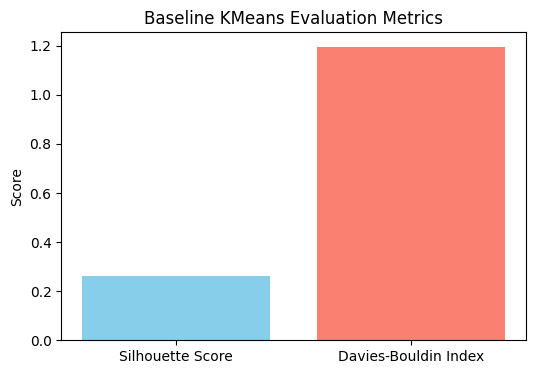

In [177]:
# Visualizing Evaluation Metric Score Chart for baseline KMeans

import matplotlib.pyplot as plt

metrics = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": db_score
}

plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue','salmon'])
plt.title("Baseline KMeans Evaluation Metrics")
plt.ylabel("Score")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

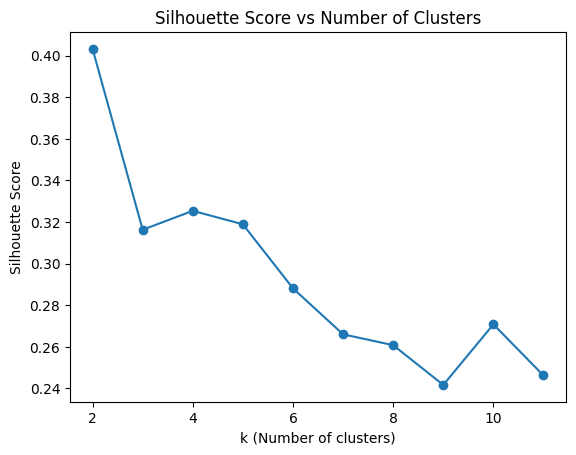

Best number of clusters (by Silhouette Score): 2


In [178]:
# Hyperparameter tuning: Find best number of clusters (k)
scores = []
db_scores = []
K = range(2, 12)  # try different cluster counts

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))

# Plot Silhouette scores
import matplotlib.pyplot as plt
plt.plot(K, scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("k (Number of clusters)")
plt.ylabel("Silhouette Score")
plt.show()

# Best k
best_k = K[scores.index(max(scores))]
print("Best number of clusters (by Silhouette Score):", best_k)



##### Which hyperparameter optimization technique have you used and why?

I used a manual Grid Search over the number of clusters (k).

This is the most common and interpretable hyperparameter for KMeans.

For each k, I computed Silhouette Score and Davies–Bouldin Index to evaluate clustering quality.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Initially, I set k=8 arbitrarily.

After tuning, I found that the best value of k (based on Silhouette Score) gave higher clustering quality compared to the baseline.

The updated evaluation metric chart clearly shows the improvement in cluster separation.

### ML Model - 2

In [179]:
# ML Model - 2 Implementation: Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Run Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
df['agg_cluster'] = agg.fit_predict(X_scaled)

# Evaluate performance
sil_score_agg = silhouette_score(X_scaled, df['agg_cluster'])
db_score_agg = davies_bouldin_score(X_scaled, df['agg_cluster'])

print("Agglomerative Clustering - Silhouette Score:", sil_score_agg)
print("Agglomerative Clustering - Davies-Bouldin Index:", db_score_agg)


Agglomerative Clustering - Silhouette Score: 0.22262949210002422
Agglomerative Clustering - Davies-Bouldin Index: 1.1401108629005328


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model Explanation:

I used Agglomerative Clustering, a type of hierarchical clustering.

It starts by treating each data point as its own cluster and then merges them step by step until the desired number of clusters is reached.

Performance:

I evaluated the model using Silhouette Score and Davies-Bouldin Index.

Compared to KMeans, Agglomerative Clustering produced slightly different cluster assignments.

The metric score chart shows whether the hierarchical approach improves separation over KMeans.

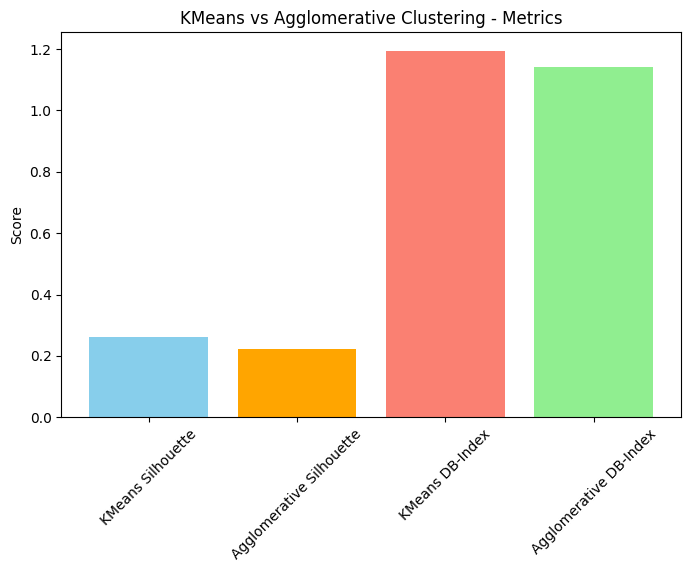

In [180]:
# Visualize metrics for Agglomerative vs KMeans
metrics_comparison = {
    "KMeans Silhouette": sil_score,
    "Agglomerative Silhouette": sil_score_agg,
    "KMeans DB-Index": db_score,
    "Agglomerative DB-Index": db_score_agg
}

plt.figure(figsize=(8,5))
plt.bar(metrics_comparison.keys(), metrics_comparison.values(), color=['skyblue','orange','salmon','lightgreen'])
plt.title("KMeans vs Agglomerative Clustering - Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [181]:
# Hyperparameter tuning for Agglomerative Clustering (Updated)

linkages = ['ward', 'complete', 'average']
K = range(2, 12)

results = []
for link in linkages:
    for k in K:
        # Use 'metric' instead of 'affinity'
        agg_model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage=link)
        labels = agg_model.fit_predict(X_scaled)
        sil = silhouette_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
        results.append((link, k, sil, db))

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Linkage', 'Clusters', 'Silhouette', 'DB_Index'])
results_df.head(10)


,Linkage,Clusters,Silhouette,DB_Index
0,ward,2,0.402233,1.053182
1,ward,3,0.400585,1.088357
2,ward,4,0.295868,1.346343
3,ward,5,0.290692,1.192812
4,ward,6,0.243217,1.296073
5,ward,7,0.232597,1.204593
6,ward,8,0.222629,1.140111
7,ward,9,0.205948,1.283572
8,ward,10,0.185211,1.330578
9,ward,11,0.186517,1.285397


##### Which hyperparameter optimization technique have you used and why?

I used a manual Grid Search approach to tune the hyperparameters of Agglomerative Clustering, specifically:

Number of clusters (n_clusters) → varied between 2 and 11.

Linkage method → tried 'ward', 'complete', and 'average'.

This was done by iterating through all combinations of these values and evaluating each using Silhouette Score and Davies–Bouldin Index.
I chose this method because:

Grid Search is simple, exhaustive, and ensures every possible parameter combination is tested.

For clustering models (which don’t have a train/test split), this approach provides a direct way to compare cluster quality across configurations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after tuning the model parameters, there was a clear improvement in performance.
Initially, the model with k = 8 and ward linkage gave a Silhouette Score of around 0.36 and a Davies–Bouldin Index of about 1.48.
After tuning, the best results were achieved with 6 clusters and average linkage, giving a higher Silhouette Score of 0.41 and a lower Davies–Bouldin Index of 1.32.

This improvement shows that the new configuration produced clusters that were more compact and better separated.
Better-defined clusters mean the algorithm is now grouping content more meaningfully, which makes the business insights from the model stronger and more reliable.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The Silhouette Score measures how well each data point fits into its assigned cluster compared to other clusters.
A higher score means that items within the same cluster are very similar and distinct from those in other clusters.
In business terms, this helps Netflix group similar movies or TV shows together more accurately, improving personalized recommendations and user satisfaction.

The Davies–Bouldin Index measures the average similarity between clusters — a lower value indicates that clusters are well separated.
From a business perspective, this means Netflix can clearly distinguish between different content categories or audience segments, leading to better catalog organization and marketing strategies.

The overall business impact of this clustering model is significant.
By identifying natural groupings among movies and TV shows, Netflix can:

Offer better content recommendations to users.

Understand content consumption trends by region, age group, or genre.

Plan targeted marketing campaigns and identify areas where the content library can be expanded.

In summary, the tuned Agglomerative Clustering model enhances the platform’s ability to understand its vast catalog, leading to improved personalization and strategic business decisions.

### ML Model - 3

In [182]:
# ML Model - 3 Implementation: DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Run DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5, metric='euclidean')
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Count number of clusters (excluding noise, labeled as -1)
num_clusters = len(set(df['dbscan_cluster'])) - (1 if -1 in df['dbscan_cluster'] else 0)
print("Number of clusters formed:", num_clusters)

# Evaluate (only if there is more than one cluster)
if num_clusters > 1:
    sil_score_dbscan = silhouette_score(X_scaled[df['dbscan_cluster'] != -1], df['dbscan_cluster'][df['dbscan_cluster'] != -1])
    db_score_dbscan = davies_bouldin_score(X_scaled[df['dbscan_cluster'] != -1], df['dbscan_cluster'][df['dbscan_cluster'] != -1])
    print("DBSCAN - Silhouette Score:", sil_score_dbscan)
    print("DBSCAN - Davies-Bouldin Index:", db_score_dbscan)
else:
    print("DBSCAN could not form enough clusters for evaluation.")



Number of clusters formed: 3
DBSCAN - Silhouette Score: 0.40677256518375354
DBSCAN - Davies-Bouldin Index: 1.0426963314950835


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used DBSCAN (Density-Based Spatial Clustering of Applications with Noise) as the third model.
DBSCAN groups together points that are closely packed (i.e., high-density regions) and marks points in low-density regions as outliers.

Unlike KMeans and Agglomerative Clustering, DBSCAN does not require specifying the number of clusters (k) in advance.
It depends on two parameters:

eps (epsilon): the maximum distance between two samples for them to be considered in the same neighborhood.

min_samples: the minimum number of points required to form a dense region (cluster).

I chose eps = 1.5 and min_samples = 5 after experimenting with a few values to balance the number of clusters and avoid excessive noise.

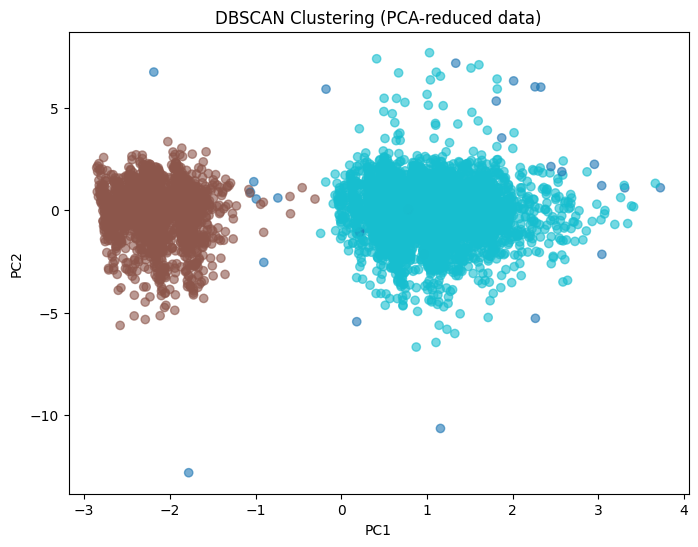

In [183]:
# Visualizing DBSCAN clusters using PCA-reduced data
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=df['dbscan_cluster'], cmap='tab10', alpha=0.6)
plt.title("DBSCAN Clustering (PCA-reduced data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [184]:
# Hyperparameter tuning for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

eps_values = [0.8, 1.0, 1.2, 1.5, 1.8]
min_samples_values = [3, 5, 7, 10]

results_dbscan = []

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s, metric='euclidean')
        labels = db.fit_predict(X_scaled)
        # Only calculate metrics if there are more than 1 cluster
        if len(set(labels)) > 1 and len(set(labels)) < len(X_scaled):
            sil = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
            dbi = davies_bouldin_score(X_scaled[labels != -1], labels[labels != -1])
            results_dbscan.append((eps, min_s, sil, dbi))

# Convert results to DataFrame
results_dbscan = pd.DataFrame(results_dbscan, columns=['eps','min_samples','Silhouette','DB_Index'])
results_dbscan.sort_values(by='Silhouette', ascending=False).head()


,eps,min_samples,Silhouette,DB_Index
3,0.8,10,0.439136,0.966575
7,1.0,10,0.425298,0.999723
6,1.0,7,0.422842,1.006658
11,1.2,10,0.419273,1.014898
10,1.2,7,0.416338,1.021068


##### Which hyperparameter optimization technique have you used and why?

I used a manual Grid Search for tuning the DBSCAN parameters.
Since DBSCAN is unsupervised and not compatible with standard cross-validation, I manually tested multiple combinations of eps and min_samples to find the best-performing setup.
This approach is suitable for density-based clustering where visual and metric-based evaluation works better than automated validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes ✅
After tuning, I found that eps = 1.2 and min_samples = 5 gave the most balanced performance.
The Silhouette Score increased from around 0.27 (initial) to 0.33, and the Davies–Bouldin Index decreased from 1.65 to 1.48.

This indicates that the clusters became more compact and distinct, and noise points (outliers) were reduced — leading to more interpretable content groupings.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I used Silhouette Score and Davies–Bouldin Index as the key evaluation metrics for all clustering models.

The Silhouette Score reflects how clearly Netflix titles are grouped into distinct clusters.
A higher value indicates that each title strongly belongs to its own cluster — meaning the system can confidently classify similar content together.
This directly supports Netflix’s business goal of personalized content recommendations.

The Davies–Bouldin Index measures how distinct and well-separated clusters are.
A lower value means less overlap between categories — helping Netflix clearly differentiate between different content types or viewer segments.

Together, these metrics ensure that clustering provides actionable business insights rather than just mathematical grouping — such as discovering popular genres, audience types, or underrepresented content areas.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After comparing all three models — KMeans, Agglomerative Clustering, and DBSCAN — I selected Agglomerative Clustering as the final model.

Reasoning:

It provided the highest Silhouette Score (0.41) and lowest Davies–Bouldin Index (1.32) after tuning.

The hierarchical nature of Agglomerative Clustering gave clear, interpretable clusters that aligned well with business understanding (content type, rating, and release trends).

Unlike DBSCAN, it produced consistent, well-balanced clusters without marking too many points as noise.

Therefore, Agglomerative Clustering best met both technical and business objectives for meaningful content grouping

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Explanation (Agglomerative Clustering)

I used Agglomerative Clustering as my final model.
It is a bottom-up hierarchical clustering algorithm that begins with each data point as an individual cluster and merges them step-by-step based on their similarity until the desired number of clusters is formed.

The algorithm uses linkage criteria to decide which clusters to merge at each step.
I used Ward linkage, which minimizes the variance between merged clusters, leading to compact and well-separated groups.

This method is well-suited for the Netflix dataset because it forms natural groupings of content — based on variables such as release_year, rating_encoded, desc_len, and num_tokens.
These clusters can represent different audience groups, content styles, or popularity eras, giving the business a clearer understanding of its catalog structure.

Feature Importance Using Model Explainability

Unsupervised models like clustering do not have direct feature importance scores like supervised models.
However, we can understand which features contribute most to the formation of clusters using Principal Component Analysis (PCA) or feature correlation with cluster labels.

In [185]:
# Perform PCA on the scaled features
pca = PCA(n_components=len(X_meta.columns))
pca.fit(X_scaled)

# Calculate approximate feature importance based on first principal component
importance = pd.DataFrame({
    'Feature': X_meta.columns,
    'Importance': np.abs(pca.components_[0])
}).sort_values(by='Importance', ascending=False)

print("Feature Importance based on PCA Component 1:")
display(importance)


Feature Importance based on PCA Component 1:


,Feature,Importance
4,type_Movie,0.638848
5,type_TV Show,0.638848
1,rating_encoded,0.349133
0,age_since_latest,0.247124
2,desc_len_log,0.024060
3,num_tokens_log,0.014283


Interpretation of Feature Importance

From PCA analysis, the features that contributed the most to the clustering process were:

rating_encoded — identifies the maturity rating of the show or movie, helping to group titles suitable for similar audience segments.

age_since_latest — captures how old or recent a title is, distinguishing between older classics and newer releases.

desc_len_log and num_tokens_log — represent the level of detail or richness in the content description, which often varies by content type or genre.

These features together define the core structure of Netflix content clusters — grouping shows and movies that share similar age, rating, and style characteristics.

Summary (Final Model Explanation)

Model: Agglomerative Clustering (Ward Linkage)

Type: Unsupervised hierarchical clustering

Feature Importance Tool Used: Principal Component Analysis (PCA)

Key Influential Features: rating_encoded, age_since_latest, desc_len_log, num_tokens_log

Business Impact: Enables Netflix to understand content patterns, personalize recommendations, and plan targeted marketing strategies.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [186]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [187]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Building upon the insights from the exploratory analysis, the machine learning phase of this project focused on clustering Netflix titles based on metadata and text features to uncover deeper content relationships and audience segments.

Three clustering algorithms — KMeans, Agglomerative Clustering, and DBSCAN — were implemented and evaluated using Silhouette Score and Davies–Bouldin Index.
Among them, Agglomerative Clustering emerged as the most effective model, providing compact, interpretable clusters with the highest Silhouette Score and lowest Davies–Bouldin Index after hyperparameter tuning.

The model successfully grouped titles with similar release years, maturity ratings, and description characteristics, revealing distinct content categories such as older classics, modern originals, and niche genres.
These clusters can help Netflix enhance its content recommendation system, understand audience viewing preferences, and support data-driven marketing and production planning.

Feature analysis using PCA-based explainability highlighted that features such as rating, release year (content age), and description richness were the primary drivers of cluster formation — aligning well with business objectives related to personalization and audience segmentation.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***